In [1]:
from dist_tools import *

%matplotlib inline
pd.set_option('precision', 2)
pd.options.display.max_columns = 1000

/home/jsaxon/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [21]:
seats = pd.read_sql("select upper(usps) usps, seats from states where fips < 57 order by usps;", index_col = "usps",
                    con = psycopg2.connect(database = "census", user = user, password = passwd,
                                           host = "saxon.harris.uchicago.edu", port = 5432))["seats"].to_dict()

In [ ]:
data = {"pa" : [2000, 2004, 2008, 2012], "md" : [2008, 2016], "nc" : [2012, 2016]}
#         "il" : [2008, 2016], ,
#         "tx" : [1996, 2000, 2004, 2008, 2012, 2016],
#         "va" : [2016], "wi" : [2004, 2008, 2012],
#         "fl" : [2008], "la" : [2012, 2016]}

seat_res, table = {}, {}
for usps, years in data.items():
    seat_res[usps], table[usps] = seat_table(usps, years)
    print(usps, end = " ")
    
seat_results = pd.concat([table[usps] for usps in sorted(data)], axis = 1)

seat_results

In [4]:
def plot_share(usps, method, year, data):

    if usps not in data:
        print(usps, "not found.")
    if method not in data[usps]:
        print(method, "not found.")

    df = data[usps][method]

    var = "{} D Fr".format(year)

    outR = df[df[var] < 0.5]
    outD = df[df[var] > 0.5]

    sns.set(rc={"figure.figsize": (6, 3)})
    sns.set_style("white")

    ax = sns.distplot(1-outD[var], kde=False, bins=np.arange(0, 1.01, 0.025),
                      hist_kws={"linewidth" : 0.2, "rwidth" : 0.9, 'weights':outD.weights.values, "alpha" : 0.7, "color" : "#0F83F4"})


    sns.distplot(1-outR[var], kde=False, ax = ax, bins=np.arange(0, 1.01, 0.025),
                 hist_kws={"histtype" : "bar", "rwidth" : 0.9, "linewidth" : 2, 'weights':outR.weights.values, "alpha" : 0.7, "color" : "#E41214"})

    sns.despine()
    ax.set_xlabel("Republican Vote Share", size = 12)
    ax.set_ylabel("Average Seats / Plan", size = 12)
    ax.set_xlim([0.05, 0.95])

    ax.get_figure().savefig("{}_{}_{}.pdf".format(usps, year, method), bbox_inches = 'tight', pad_inches = 0.1)

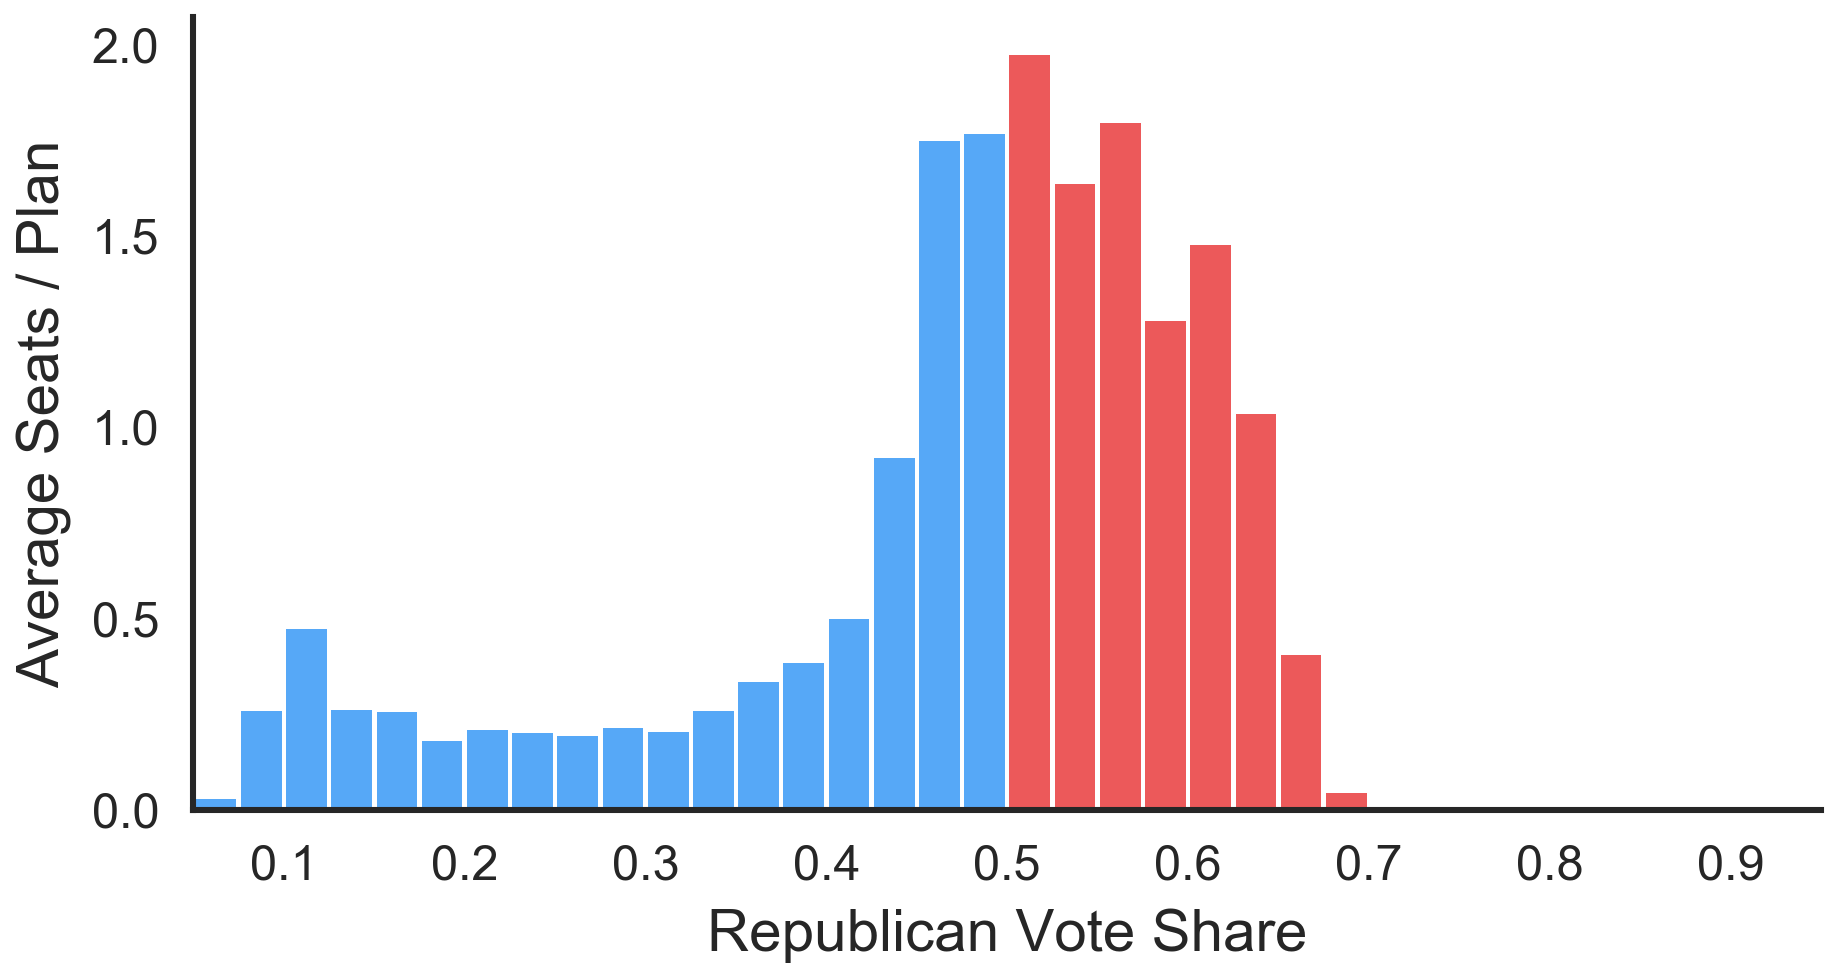

In [5]:
plot_share("pa", "polsby", 2012, seat_res)

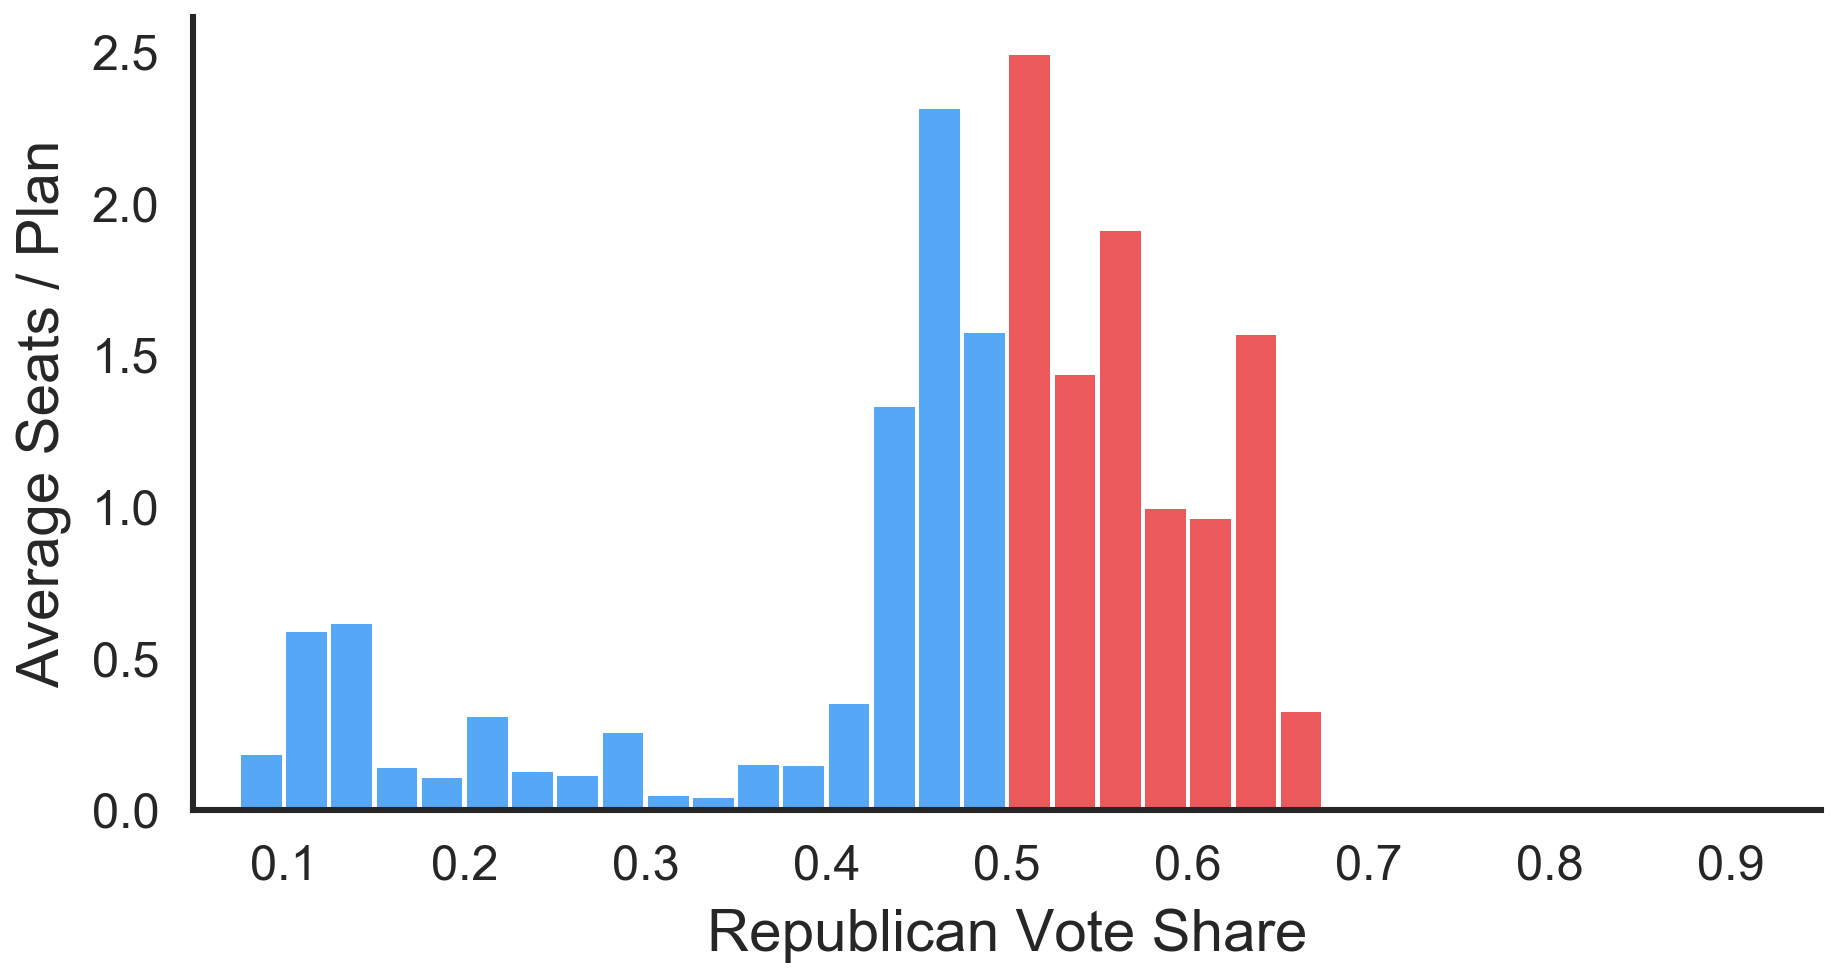

In [6]:
plot_share("pa", "power", 2012, seat_res)

In [41]:
seat_res["md"].keys()

dict_keys(['dyn_radius', 'rohrbach', '107', 'reock', 'exchange', 'power', 'polsby', '114', 'split', 'ehrenburg', '111', 'hull_p'])

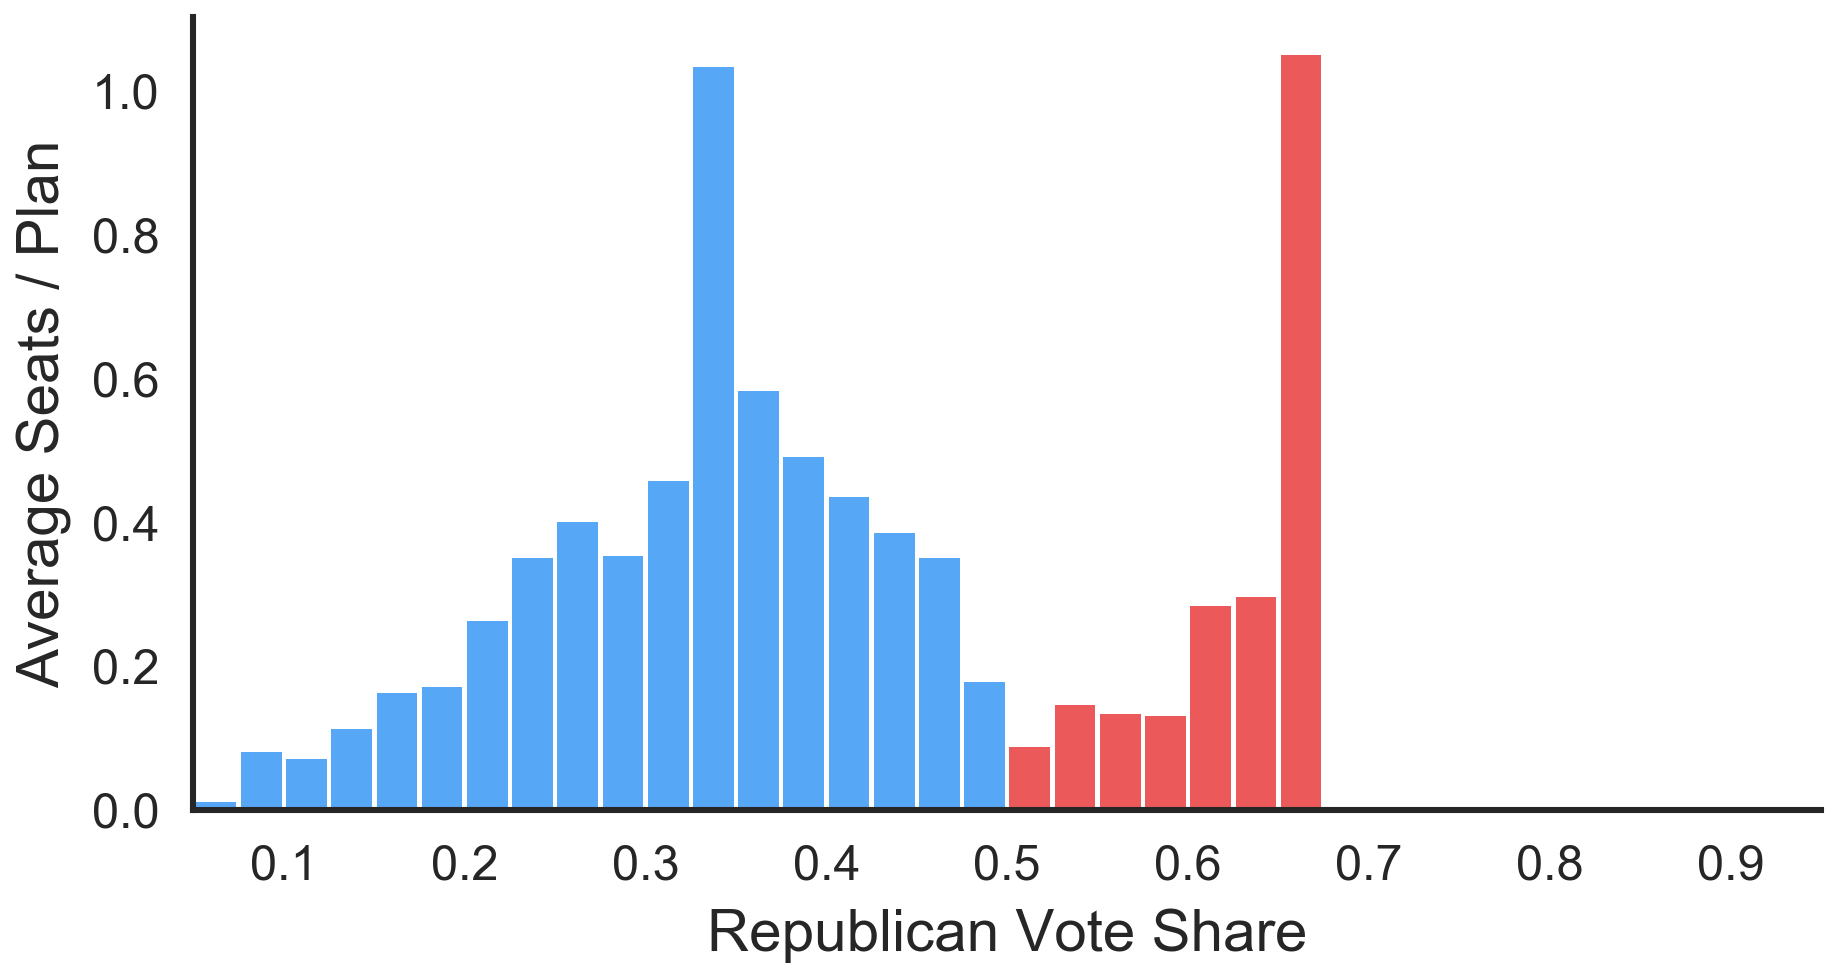

In [8]:
plot_share("md", "polsby", 2016, seat_res)

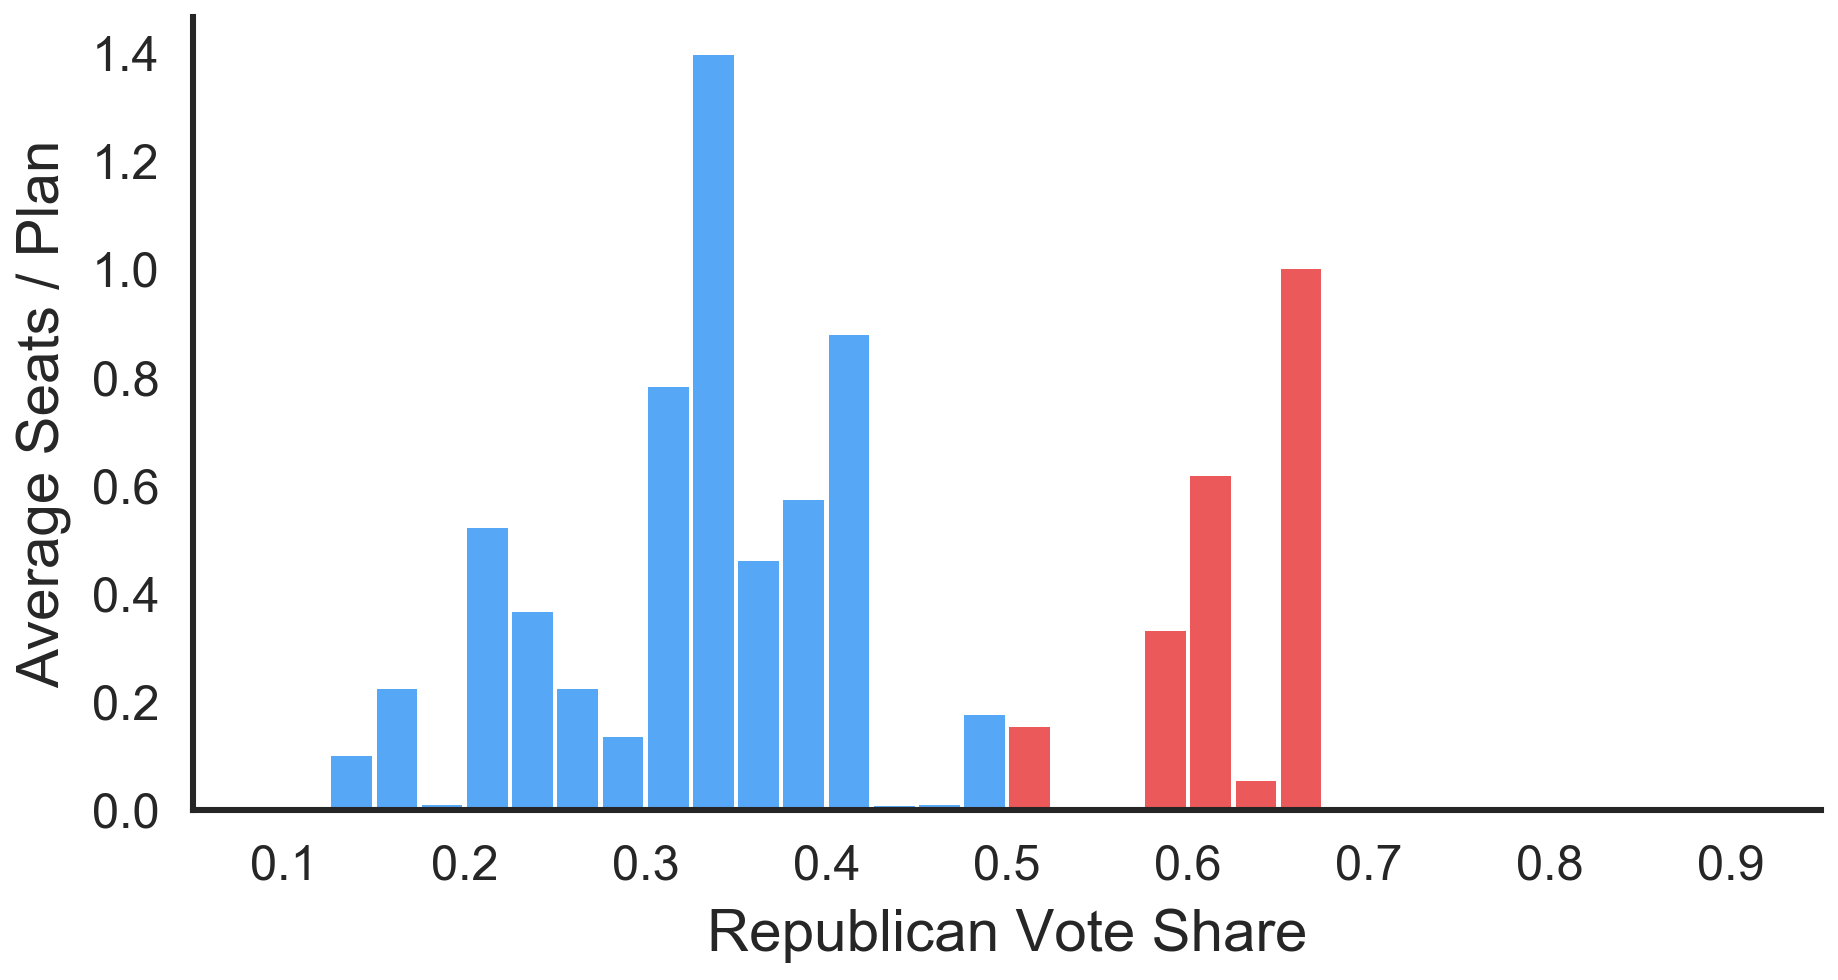

In [7]:
plot_share("md", "power", 2016, seat_res)

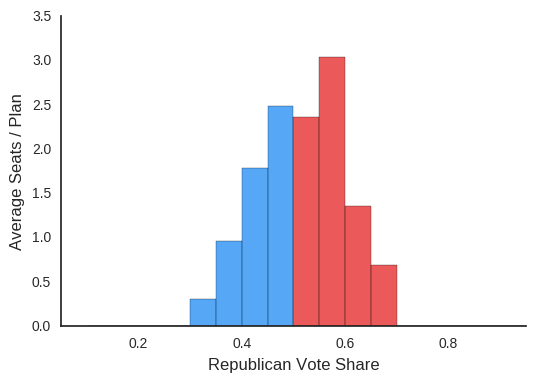

In [13]:
plot_share("nc", "dyn_radius", 2012, seat_res)

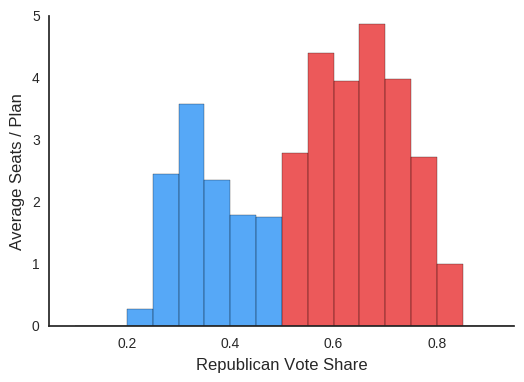

In [14]:
plot_share("tx", "power", 2016, seat_res)

In [4]:
data = {"pa" : [2000, 2004, 2008, 2012], "il" : [2008, 2016], 
        "md" : [2008, 2016], "nc" : [2012, 2016],
        "tx" : [1996, 2000, 2004, 2008, 2012, 2016],
        "va" : [2016], "wi" : [2004, 2008, 2012],
        "fl" : [2008], "la" : [2012, 2016]}


seat_res, table = {}, {}
for usps, years in data.items():
    seat_res[usps], table[usps] = minority_table(usps, years)
    print(usps, end = " ")
    
seat_results = pd.concat([table[usps] for usps in sorted(data)], axis = 1)

seat_results

NameError: name 'minority_table' is not defined